In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
df=pd.read_csv("BostonHousing.csv")

In [7]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [8]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
390,6.96215,0.0,18.10,0,0.700,5.713,97.0,1.9265,24,666,20.2,17.11,15.1,0
414,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,36.98,7.0,0
391,5.29305,0.0,18.10,0,0.700,6.051,82.5,2.1678,24,666,20.2,18.76,23.2,0
175,0.06664,0.0,4.05,0,0.510,6.546,33.1,3.1323,5,296,16.6,5.33,29.4,0
260,0.54011,20.0,3.97,0,0.647,7.203,81.8,2.1121,5,264,13.0,9.59,33.8,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [10]:
df.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [11]:
df.shape

(506, 14)

In [12]:
df.fillna(df.mean(), inplace=True)

In [13]:
df.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [14]:
df.shape

(506, 14)

<Axes: >

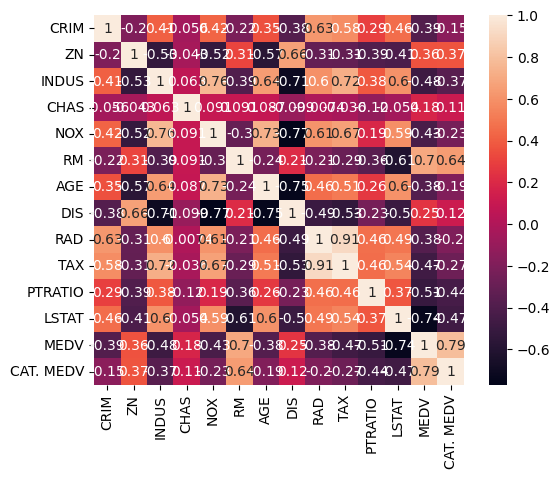

In [15]:
sns.heatmap(df.corr(),annot=True,square=True)

In [16]:
X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
x_train.shape, x_test.shape

((354, 13), (152, 13))

In [20]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(13,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
   
    Dense(1)  
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(x_train,y_train,epochs=150,batch_size=32,validation_split=0.03)

Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 543.3473 - mae: 21.7255 - val_loss: 609.9594 - val_mae: 22.8502
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 544.1436 - mae: 21.5095 - val_loss: 557.8602 - val_mae: 21.6741
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 469.6901 - mae: 19.8861 - val_loss: 460.2540 - val_mae: 19.2546
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 341.8878 - mae: 16.5039 - val_loss: 290.5511 - val_mae: 13.9761
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 170.6115 - mae: 10.8548 - val_loss: 128.0370 - val_mae: 8.3822
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 62.6698 - mae: 5.8335 - val_loss: 96.3986 - val_mae: 6.3849
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 48.2108 - mae: 5.0338 - val_loss: 104.1391 - val_mae: 6.7218
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.5335 - mae: 3.7110 - val_loss: 84.7483 - val_mae: 5.9299
Epoch 9/150
11/11 ━━━━━━━

In [26]:
loss,mae=model.evaluate(x_test,y_test,verbose=0)
print(f"Mean Squared Error",loss)
print(f"Mean Absolute Error", mae)

Mean Squared Error 7.2752861976623535
Mean Absolute Error 2.018359661102295


In [28]:
predictions = model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [29]:
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: ",rmse)
# Compute R² Score
r2 = r2_score(y_test, predictions)
print(f"R2 Score : ",r2)

RMSE:  2.697273789744039
R2 Score :  0.92548368852463


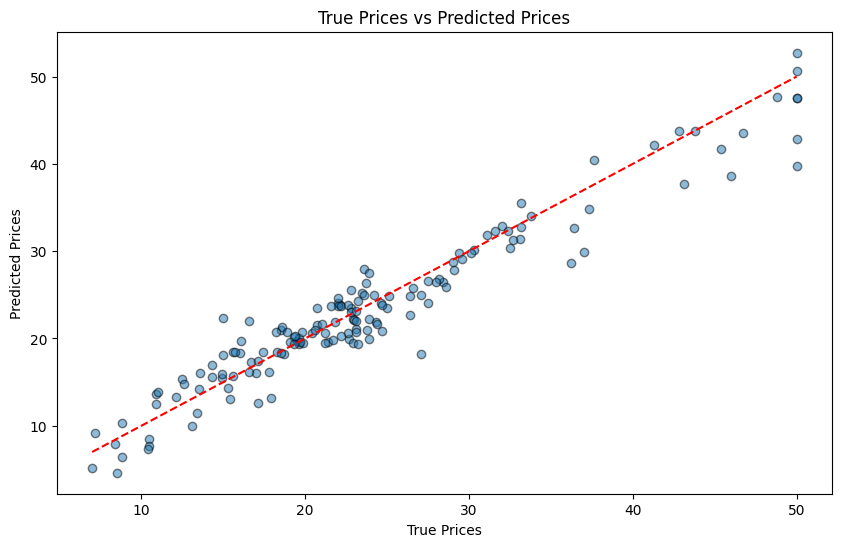

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions,alpha=0.5, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")  
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True Prices vs Predicted Prices")
plt.show()

In [32]:
# Predictions 

predicted_value = model.predict(x_test[0].reshape(1, -1))
print(f"Prediction for X_test[{0}]: {predicted_value[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Prediction for X_test[0]: [26.482258]
